In [5]:
import os

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

def set_size(fraction_width=0.95, fraction_height=0.25):
    width_pt = 241.14749 # column width in pt
    height_pt = 626.0 # page height in pt

    fig_width_pt = width_pt * fraction_width
    fig_height_pt = height_pt * fraction_height
    inches_per_pt = 1 / 72.27

    fig_width_in = fig_width_pt * inches_per_pt
    fig_height_in = fig_height_pt * inches_per_pt

    return fig_width_in, fig_height_in

# Result Set Sizes

{'Single-Table': [62.706, 161.894, 258.49, 459.892, 275.023, 934.416, 676.904], 'ResultDB': [794.327, 191.028, 504.641, 3244.61, 527.541, 3300.5, 1133.39], 'ResultDB-Optimized': [515.092, 185.444, 416.926, 977.558, 268.504, 2380.47, 1598.06], 'ResultDB-Greedy-Optimized': [527.796, 193.109, 408.562, 967.055, 266.029, 2411.41, 1587.76]}


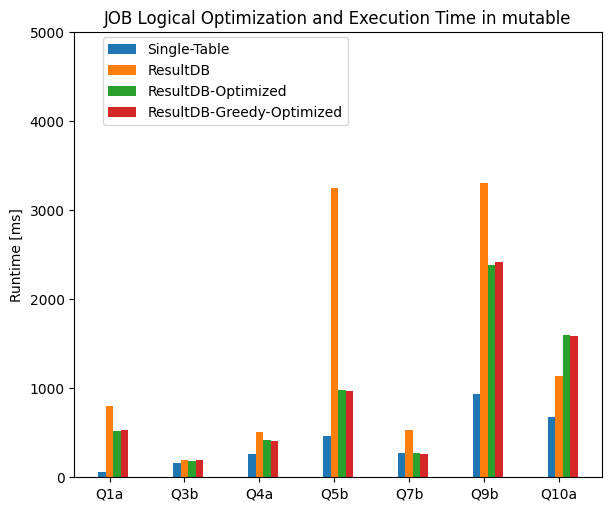

In [21]:
 # construct the following dictionary:
# {
#   'Single-Table': [q4_time, q5_time, ...]
#   'Single-Table + Denom': [q4_time, q5_time, ...]
#   'Result-DB': [q4_time, q5_time, ...]
# }
algorithm_times = {
    'Single-Table': [],
    'ResultDB': [],
    'ResultDB-Optimized': [],
    'ResultDB-Greedy-Optimized': [],
}
# ensure that `queries` is sorted!
queries = [
    'Q1a',
    'Q3b',
    'Q4a',
    'Q5b',
    'Q7b',
    'Q9b',
    'Q10a'
]
data = pd.read_csv('./mutable-internal/evaluation/standard.csv')
data = (data.groupby(by=['commit', 'date', 'version', 'suite', 'benchmark', 'experiment', 'name', 'config', 'case',], as_index=False)
                .median()
                .drop(['commit', 'date', 'version', 'suite', 'benchmark', 'case', 'runid'], axis=1)
        )
num_queries = 0
for query in queries:
    # Get Results for each query 
    query_data = data[data['experiment'] == query]

    for _, row in query_data.iterrows():
        if 'Optimization' in row['config']:
            continue
        algorithm = row['name']
        execution_time = row['time']
        if "Single-Table" in algorithm:
            algorithm_times['Single-Table'].append(execution_time)
        elif "NoOpt" in algorithm:
            algorithm_times['ResultDB'].append(execution_time)
        elif "NoGreedyCuts" in algorithm:
            algorithm_times['ResultDB-Optimized'].append(execution_time)
        elif "GreedyCuts" in algorithm:
            algorithm_times['ResultDB-Greedy-Optimized'].append(execution_time)
        else:
            assert False, f"experiment name: {algorithm} does not match any of our algorithms"
# display(algorithm_times)
            
# plot data
x = np.arange(len(queries))  # the label locations
print(algorithm_times)
width = 0.10  # the width of the bars
multiplier = 0
fig, ax = plt.subplots(layout='constrained', figsize=(6,5))
for algorithm, time in algorithm_times.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, time, width, label=algorithm)
    # ax.bar_label(rects, padding=3, size=8)
    multiplier += 1

ax.set_ylabel('Runtime [ms]')
ax.set_title('JOB Logical Optimization and Execution Time in mutable')
ax.set_xticks(x + width, queries)
ax.set_ylim(0, 5000)
# ax.set_yscale('log')
# fig.legend()
fig.legend(bbox_to_anchor=(0.15, 0.95), loc='upper left')

fig.savefig('job-standardbenchmarks.pdf')

{'Single-Table': [58.044, 151.995, 214.341, 348.166, 237.023, 927.969, 742.332], 'ResultDB': [489.466, 299.989, 567.243, 619.645, 1153.35, 2654.06, 10000.0], 'ResultDB-Optimized': [506.635, 297.229, 402.786, 583.973, 1266.93, 2696.53, 2016.88]}


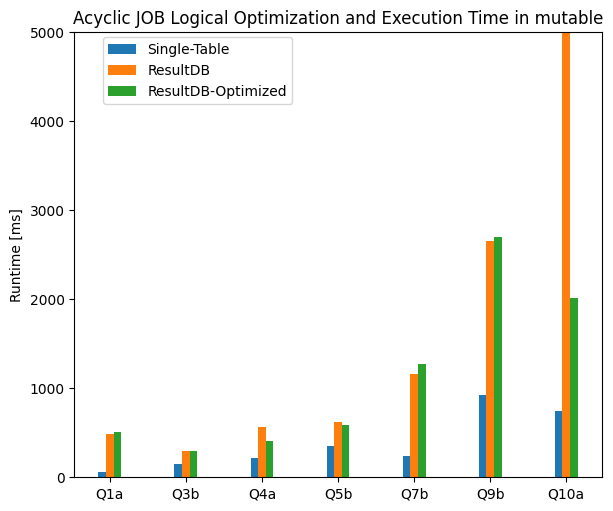

In [22]:
 # construct the following dictionary:
# {
#   'Single-Table': [q4_time, q5_time, ...]
#   'Single-Table + Denom': [q4_time, q5_time, ...]
#   'Result-DB': [q4_time, q5_time, ...]
# }
algorithm_times = {
    'Single-Table': [],
    'ResultDB': [],
    'ResultDB-Optimized': [],
}
# ensure that `queries` is sorted!
queries = [
    'Q1a',
    'Q3b',
    'Q4a',
    'Q5b',
    'Q7b',
    'Q9b',
    'Q10a'
]
data = pd.read_csv('./mutable-internal/evaluation/acyclic.csv')
data = (data.groupby(by=['commit', 'date', 'version', 'suite', 'benchmark', 'experiment', 'name', 'config', 'case',], as_index=False)
                .median()
                .drop(['commit', 'date', 'version', 'suite', 'benchmark', 'case', 'runid'], axis=1)
        )
num_queries = 0
for query in queries:
    # Get Results for each query 
    query_data = data[data['experiment'] == query]

    for _, row in query_data.iterrows():
        if 'Optimization' in row['config']:
            continue
        algorithm = row['name']
        execution_time = row['time']
        if "Single-Table" in algorithm:
            algorithm_times['Single-Table'].append(execution_time)
        elif "NoOpt" in algorithm:
            algorithm_times['ResultDB'].append(execution_time)
        elif "NoGreedyCuts" in algorithm:
            algorithm_times['ResultDB-Optimized'].append(execution_time)
        elif "GreedyCuts" in algorithm:
            algorithm_times['ResultDB-Greedy-Optimized'].append(execution_time)
        else:
            assert False, f"experiment name: {algorithm} does not match any of our algorithms"
# display(algorithm_times)
            
# plot data
x = np.arange(len(queries))  # the label locations
print(algorithm_times)
width = 0.10  # the width of the bars
multiplier = 0
fig, ax = plt.subplots(layout='constrained', figsize=(6,5))
for algorithm, time in algorithm_times.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, time, width, label=algorithm)
    # ax.bar_label(rects, padding=3, size=8)
    multiplier += 1

ax.set_ylabel('Runtime [ms]')
ax.set_title('Acyclic JOB Logical Optimization and Execution Time in mutable')
ax.set_xticks(x + width, queries)
ax.set_ylim(0, 5000)
# ax.set_yscale('log')
# fig.legend()
fig.legend(bbox_to_anchor=(0.15, 0.95), loc='upper left')

fig.savefig('job-acyclic-benchmarks.pdf')

# Chain Benchmarks

{'DP_CCP': [0.01, 0.01, 0.015, 0.025, 0.054, 0.091, 0.155, 0.442, 0.36, 0.44], 'ResultDB': [0.005, 0.008, 0.011, 0.018, 0.031, 0.046, 0.067, 0.141, 0.116, 0.137], 'ResultDB-Optimized': [0.006, 0.009, 0.014, 0.021, 0.037, 0.059, 0.098, 0.325, 0.12, 0.14], 'ResultDB-Optimized-Weak': [0.011, 0.009, 0.013, 0.021, 0.036, 0.056, 0.093, 0.274, 0.12, 0.139], 'ResultDB-Greedy-Optimized': [0.006, 0.009, 0.013, 0.021, 0.035, 0.057, 0.091, 0.194, 0.119, 0.14], 'ResultDB-Greedy-Optimized-Weak': [0.009, 0.009, 0.013, 0.021, 0.039, 0.056, 0.094, 0.317, 0.118, 0.14]}


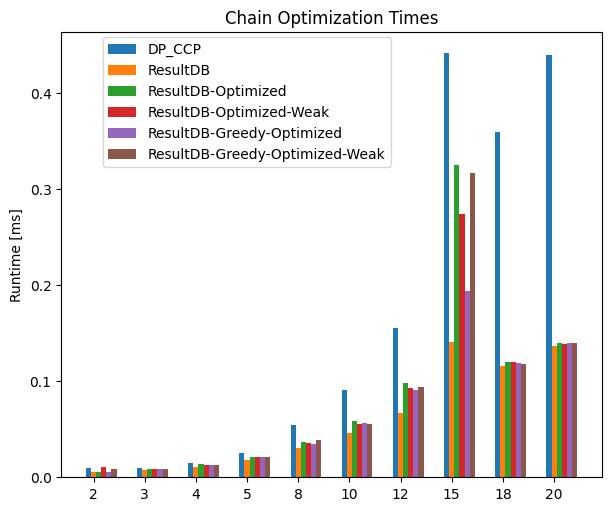

In [23]:
 # construct the following dictionary:
# {
#   'Single-Table': [q4_time, q5_time, ...]
#   'Single-Table + Denom': [q4_time, q5_time, ...]
#   'Result-DB': [q4_time, q5_time, ...]
# }
algorithm_times = {
    'DP_CCP': [],
    'ResultDB': [],
    'ResultDB-Optimized': [],
    'ResultDB-Optimized-Weak': [],
    'ResultDB-Greedy-Optimized': [],
    'ResultDB-Greedy-Optimized-Weak': []
}
# ensure that `queries` is sorted!
sizes = [2, 3, 4, 5, 8, 10, 12, 15, 18, 20]
data = pd.read_csv('./mutable-internal/evaluation/chain_results.csv')
data = (data.groupby(by=['commit', 'date', 'version', 'suite', 'benchmark', 'experiment', 'name', 'config', 'case',], as_index=False)
                .median()
                .drop(['commit', 'date', 'version', 'suite', 'benchmark', 'experiment', 'runid'], axis=1)
        )
num_queries = 0
for size in sizes:
    # Get Results for each query 
    size_data = data[data['case'] == size]

    for _, row in size_data.iterrows():
        algorithm = row['name']
        execution_time = row['time']
        if "Single-Table" in algorithm:
            algorithm_times['Single-Table'].append(execution_time)
        elif "RESULTDB-Opt-Greedy-Weak" in algorithm:
            algorithm_times['ResultDB-Greedy-Optimized-Weak'].append(execution_time)
        elif "RESULTDB-Opt-Greedy" in algorithm:
            algorithm_times['ResultDB-Greedy-Optimized'].append(execution_time)
        elif "RESULTDB-Opt-Weak" in algorithm:
            algorithm_times['ResultDB-Optimized-Weak'].append(execution_time)
        elif "RESULTDB-Opt" in algorithm:
            algorithm_times['ResultDB-Optimized'].append(execution_time)
        elif "RESULTDB" in algorithm and not "NoGreedyCuts" in algorithm:
            algorithm_times['ResultDB'].append(execution_time)
        elif "DP" in algorithm:
            algorithm_times['DP_CCP'].append(execution_time)
        else:
            assert False, f"experiment name: {name} does not match any of our algorithms"
# display(algorithm_times)
print(algorithm_times)         
# plot data
x = np.arange(len(sizes))  # the label locations
width = 0.10  # the width of the bars
multiplier = 0
fig, ax = plt.subplots(layout='constrained', figsize=(6,5))
for algorithm, time in algorithm_times.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, time, width, label=algorithm)
    # ax.bar_label(rects, padding=3, size=8)
    multiplier += 1

ax.set_ylabel('Runtime [ms]')
ax.set_title('Chain Optimization Times')
ax.set_xticks(x + width, sizes)
ax.set_ylim(0)
# ax.set_yscale('log')
# fig.legend()
fig.legend(bbox_to_anchor=(0.15, 0.95), loc='upper left')

fig.savefig('chain-benchmarks.pdf')


# Star Benchmarks

{'DP_CCP': [0.017, 0.013, 0.017, 0.027, 0.074, 0.156, 0.42, 3.056, 113.938, 889.192], 'ResultDB': [0.005, 0.007, 0.011, 0.017, 0.03, 0.044, 0.061, 0.137, 0.109, 0.13], 'ResultDB-Optimized': [0.006, 0.009, 0.013, 0.021, 0.036, 0.059, 0.072, 0.147, 0.128, 0.151], 'ResultDB-Optimized-Weak': [0.006, 0.009, 0.012, 0.019, 0.036, 0.049, 0.067, 0.136, 0.117, 0.139], 'ResultDB-Greedy-Optimized': [0.006, 0.009, 0.012, 0.019, 0.034, 0.048, 0.066, 0.138, 0.117, 0.138], 'ResultDB-Greedy-Optimized-Weak': [0.006, 0.009, 0.013, 0.02, 0.035, 0.052, 0.072, 0.153, 0.126, 0.15]}


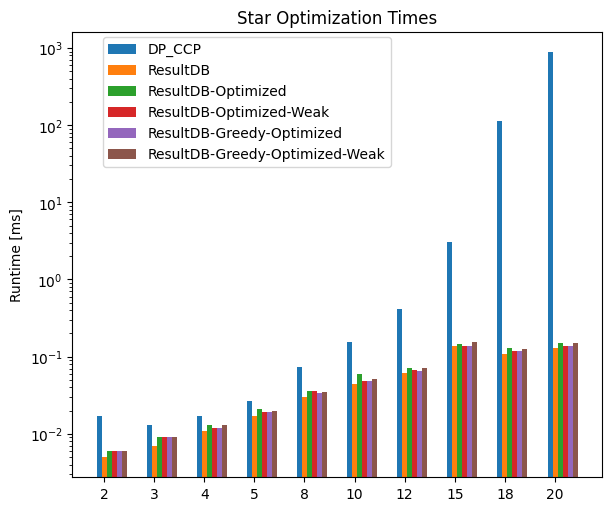

In [24]:
 # construct the following dictionary:
# {
#   'Single-Table': [q4_time, q5_time, ...]
#   'Single-Table + Denom': [q4_time, q5_time, ...]
#   'Result-DB': [q4_time, q5_time, ...]
# }
algorithm_times = {
    'DP_CCP': [],
    'ResultDB': [],
    'ResultDB-Optimized': [],
    'ResultDB-Optimized-Weak': [],
    'ResultDB-Greedy-Optimized': [],
    'ResultDB-Greedy-Optimized-Weak': []
}
# ensure that `queries` is sorted!
sizes = [2, 3, 4, 5, 8, 10, 12, 15, 18, 20]
data = pd.read_csv('./mutable-internal/evaluation/star_results.csv')
data = (data.groupby(by=['commit', 'date', 'version', 'suite', 'benchmark', 'experiment', 'name', 'config', 'case',], as_index=False)
                .median()
                .drop(['commit', 'date', 'version', 'suite', 'benchmark', 'experiment', 'runid'], axis=1)
        )
num_queries = 0
for size in sizes:
    # Get Results for each query 
    size_data = data[data['case'] == size]

    for _, row in size_data.iterrows():
        algorithm = row['name']
        execution_time = row['time']
        if "Single-Table" in algorithm:
            algorithm_times['Single-Table'].append(execution_time)
        elif "RESULTDB-Opt-Greedy-Weak" in algorithm:
            algorithm_times['ResultDB-Greedy-Optimized-Weak'].append(execution_time)
        elif "RESULTDB-Opt-Greedy" in algorithm:
            algorithm_times['ResultDB-Greedy-Optimized'].append(execution_time)
        elif "RESULTDB-Opt-Weak" in algorithm:
            algorithm_times['ResultDB-Optimized-Weak'].append(execution_time)
        elif "RESULTDB-Opt" in algorithm:
            algorithm_times['ResultDB-Optimized'].append(execution_time)
        elif "RESULTDB" in algorithm and not "NoGreedyCuts" in algorithm:
            algorithm_times['ResultDB'].append(execution_time)
        elif "DP" in algorithm:
            algorithm_times['DP_CCP'].append(execution_time)
        else:
            assert False, f"experiment name: {name} does not match any of our algorithms"
# display(algorithm_times)
print(algorithm_times)         
# plot data
x = np.arange(len(sizes))  # the label locations
width = 0.10  # the width of the bars
multiplier = 0
fig, ax = plt.subplots(layout='constrained', figsize=(6,5))
for algorithm, time in algorithm_times.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, time, width, label=algorithm)
    # ax.bar_label(rects, padding=3, size=8)
    multiplier += 1

ax.set_ylabel('Runtime [ms]')
ax.set_title('Star Optimization Times')
ax.set_xticks(x + width, sizes)
#ax.set_ylim(0, 1)
ax.set_yscale('log')
# fig.legend()
fig.legend(bbox_to_anchor=(0.15, 0.95), loc='upper left')

fig.savefig('star-benchmarks.pdf')


In [10]:
# 

# Cycle Benchmarks

{'DP_CCP': [0.005, 0.011, 0.016, 0.027, 0.06, 0.092, 0.138, 0.265, 0.465, 0.599], 'ResultDB': [0.005, 0.015, 0.019, 0.028, 0.07, 0.103, 0.134, 0.699, 0.397, 0.338], 'ResultDB-Optimized': [0.006, 0.02, 0.024, 0.035, 0.072, 0.114, 0.169, 0.319, 0.563, 0.694], 'ResultDB-Optimized-Weak': [0.006, 0.017, 0.021, 0.03, 0.062, 0.099, 0.147, 0.281, 0.491, 0.64], 'ResultDB-Greedy-Optimized': [0.007, 0.019, 0.023, 0.033, 0.068, 0.106, 0.156, 0.301, 0.517, 0.69], 'ResultDB-Greedy-Optimized-Weak': [0.006, 0.019, 0.023, 0.034, 0.069, 0.109, 0.161, 0.29, 0.494, 0.642]}


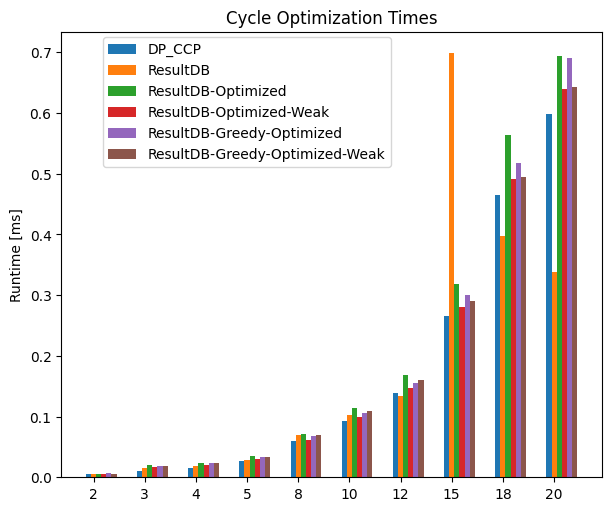

In [25]:
 # construct the following dictionary:
# {
#   'Single-Table': [q4_time, q5_time, ...]
#   'Single-Table + Denom': [q4_time, q5_time, ...]
#   'Result-DB': [q4_time, q5_time, ...]
# }
algorithm_times = {
    'DP_CCP': [],
    'ResultDB': [],
    'ResultDB-Optimized': [],
    'ResultDB-Optimized-Weak': [],
    'ResultDB-Greedy-Optimized': [],
    'ResultDB-Greedy-Optimized-Weak': []
}
# ensure that `queries` is sorted!
sizes = [2, 3, 4, 5, 8, 10, 12, 15, 18, 20]
data = pd.read_csv('./mutable-internal/evaluation/cycle_results.csv')
data = (data.groupby(by=['commit', 'date', 'version', 'suite', 'benchmark', 'experiment', 'name', 'config', 'case',], as_index=False)
                .median()
                .drop(['commit', 'date', 'version', 'suite', 'benchmark', 'experiment', 'runid'], axis=1)
        )
num_queries = 0
for size in sizes:
    # Get Results for each query 
    size_data = data[data['case'] == size]

    for _, row in size_data.iterrows():
        algorithm = row['name']
        execution_time = row['time']
        if "Single-Table" in algorithm:
            algorithm_times['Single-Table'].append(execution_time)
        elif "RESULTDB-Opt-Greedy-Weak" in algorithm:
            algorithm_times['ResultDB-Greedy-Optimized-Weak'].append(execution_time)
        elif "RESULTDB-Opt-Greedy" in algorithm:
            algorithm_times['ResultDB-Greedy-Optimized'].append(execution_time)
        elif "RESULTDB-Opt-Weak" in algorithm:
            algorithm_times['ResultDB-Optimized-Weak'].append(execution_time)
        elif "RESULTDB-Opt" in algorithm:
            algorithm_times['ResultDB-Optimized'].append(execution_time)
        elif "RESULTDB" in algorithm and not "NoGreedyCuts" in algorithm:
            algorithm_times['ResultDB'].append(execution_time)
        elif "DP" in algorithm:
            algorithm_times['DP_CCP'].append(execution_time)
        else:
            assert False, f"experiment name: {name} does not match any of our algorithms"
# display(algorithm_times)
print(algorithm_times)         
# plot data
x = np.arange(len(sizes))  # the label locations
width = 0.10  # the width of the bars
multiplier = 0
fig, ax = plt.subplots(layout='constrained', figsize=(6,5))
for algorithm, time in algorithm_times.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, time, width, label=algorithm)
    # ax.bar_label(rects, padding=3, size=8)
    multiplier += 1

ax.set_ylabel('Runtime [ms]')
ax.set_title('Cycle Optimization Times')
ax.set_xticks(x + width, sizes)
ax.set_ylim(0)
#ax.set_yscale('log')
# fig.legend()
fig.legend(bbox_to_anchor=(0.15, 0.95), loc='upper left')

fig.savefig('cycle-benchmarks.pdf')

# Clique Benchmarks


{'DP_CCP': [0.006, 0.01, 0.017, 0.032, 0.121, 0.563, 4.173], 'ResultDB': [0.005, 0.014, 0.022, 0.035, 0.16, 0.295, 0.547], 'ResultDB-Optimized': [0.007, 0.019, 0.026, 0.045, 0.159, 0.755, 5.129], 'ResultDB-Optimized-Weak': [0.007, 0.018, 0.026, 0.043, 0.145, 0.701, 5.014], 'ResultDB-Greedy-Optimized': [0.01, 0.021, 0.031, 0.048, 0.187, 0.793, 5.412], 'ResultDB-Greedy-Optimized-Weak': [0.007, 0.019, 0.027, 0.045, 0.159, 0.719, 4.929]}


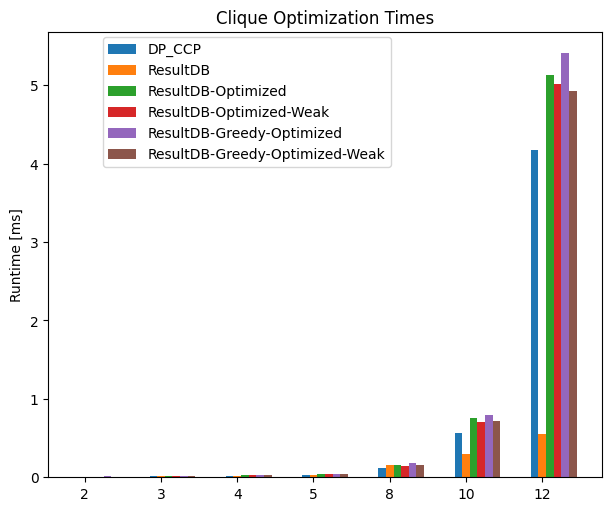

In [26]:
 # construct the following dictionary:
# {
#   'Single-Table': [q4_time, q5_time, ...]
#   'Single-Table + Denom': [q4_time, q5_time, ...]
#   'Result-DB': [q4_time, q5_time, ...]
# }
algorithm_times = {
    'DP_CCP': [],
    'ResultDB': [],
    'ResultDB-Optimized': [],
    'ResultDB-Optimized-Weak': [],
    'ResultDB-Greedy-Optimized': [],
    'ResultDB-Greedy-Optimized-Weak': []
}
# ensure that `queries` is sorted!
sizes = [2, 3, 4, 5, 8, 10, 12]
data = pd.read_csv('./mutable-internal/evaluation/clique_results.csv')
data = (data.groupby(by=['commit', 'date', 'version', 'suite', 'benchmark', 'experiment', 'name', 'config', 'case',], as_index=False)
                .median()
                .drop(['commit', 'date', 'version', 'suite', 'benchmark', 'experiment', 'runid'], axis=1)
        )
num_queries = 0
for size in sizes:
    # Get Results for each query 
    size_data = data[data['case'] == size]

    for _, row in size_data.iterrows():
        algorithm = row['name']
        execution_time = row['time']
        if "Single-Table" in algorithm:
            algorithm_times['Single-Table'].append(execution_time)
        elif "RESULTDB-Opt-Greedy-Weak" in algorithm:
            algorithm_times['ResultDB-Greedy-Optimized-Weak'].append(execution_time)
        elif "RESULTDB-Opt-Greedy" in algorithm:
            algorithm_times['ResultDB-Greedy-Optimized'].append(execution_time)
        elif "RESULTDB-Opt-Weak" in algorithm:
            algorithm_times['ResultDB-Optimized-Weak'].append(execution_time)
        elif "RESULTDB-Opt" in algorithm:
            algorithm_times['ResultDB-Optimized'].append(execution_time)
        elif "RESULTDB" in algorithm and not "NoGreedyCuts" in algorithm:
            algorithm_times['ResultDB'].append(execution_time)
        elif "DP" in algorithm:
            algorithm_times['DP_CCP'].append(execution_time)
        else:
            assert False, f"experiment name: {name} does not match any of our algorithms"
# display(algorithm_times)
print(algorithm_times)         
# plot data
x = np.arange(len(sizes))  # the label locations
width = 0.10  # the width of the bars
multiplier = 0
fig, ax = plt.subplots(layout='constrained', figsize=(6,5))
for algorithm, time in algorithm_times.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, time, width, label=algorithm)
    # ax.bar_label(rects, padding=3, size=8)
    multiplier += 1

ax.set_ylabel('Runtime [ms]')
ax.set_title('Clique Optimization Times')
ax.set_xticks(x + width, sizes)
ax.set_ylim(0)
#ax.set_yscale('log')
# fig.legend()
fig.legend(bbox_to_anchor=(0.15, 0.95), loc='upper left')

fig.savefig('clique-benchmarks.pdf')

# Cycle + One Inner Edge

{'DP_CCP': [0.008, 0.011, 0.016, 0.028, 0.067, 0.123, 0.194, 0.539, 1.65, 2.155], 'ResultDB': [0.007, 0.016, 0.019, 0.026, 0.064, 0.113, 0.192, 0.675, 2.391, 1.618], 'ResultDB-Optimized': [0.008, 0.02, 0.027, 0.038, 0.078, 0.134, 0.222, 0.396, 1.628, 2.263], 'ResultDB-Optimized-Weak': [0.007, 0.019, 0.025, 0.035, 0.077, 0.136, 0.216, 0.383, 1.753, 2.234], 'ResultDB-Greedy-Optimized': [0.007, 0.02, 0.026, 0.036, 0.066, 0.085, 0.124, 0.233, 0.25, 0.333], 'ResultDB-Greedy-Optimized-Weak': [0.007, 0.019, 0.027, 0.034, 0.064, 0.082, 0.118, 0.22, 0.244, 0.315]}


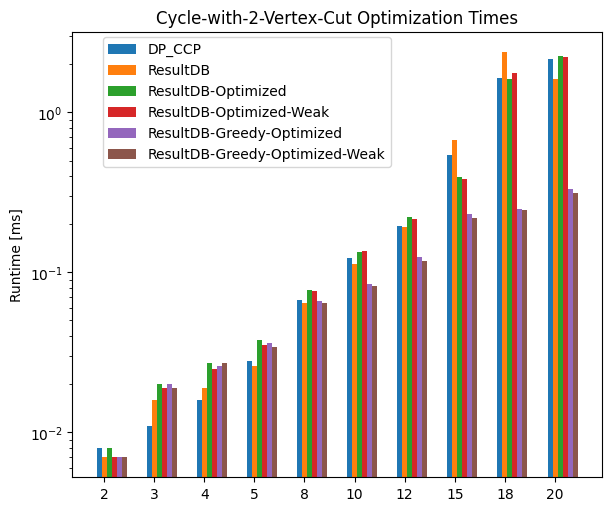

In [27]:
 # construct the following dictionary:
# {
#   'Single-Table': [q4_time, q5_time, ...]
#   'Single-Table + Denom': [q4_time, q5_time, ...]
#   'Result-DB': [q4_time, q5_time, ...]
# }
algorithm_times = {
    'DP_CCP': [],
    'ResultDB': [],
    'ResultDB-Optimized': [],
    'ResultDB-Optimized-Weak': [],
    'ResultDB-Greedy-Optimized': [],
    'ResultDB-Greedy-Optimized-Weak': []
}
# ensure that `queries` is sorted!
sizes = [2, 3, 4, 5, 8, 10, 12, 15, 18, 20]
data = pd.read_csv('./mutable-internal/evaluation/cycle_plus_one_inner_edge_results.csv')
data = (data.groupby(by=['commit', 'date', 'version', 'suite', 'benchmark', 'experiment', 'name', 'config', 'case',], as_index=False)
                .median()
                .drop(['commit', 'date', 'version', 'suite', 'benchmark', 'experiment', 'runid'], axis=1)
        )
num_queries = 0
for size in sizes:
    # Get Results for each query 
    size_data = data[data['case'] == size]

    for _, row in size_data.iterrows():
        algorithm = row['name']
        execution_time = row['time']
        if "Single-Table" in algorithm:
            algorithm_times['Single-Table'].append(execution_time)
        elif "RESULTDB-Opt-Greedy-Weak" in algorithm:
            algorithm_times['ResultDB-Greedy-Optimized-Weak'].append(execution_time)
        elif "RESULTDB-Opt-Greedy" in algorithm:
            algorithm_times['ResultDB-Greedy-Optimized'].append(execution_time)
        elif "RESULTDB-Opt-Weak" in algorithm:
            algorithm_times['ResultDB-Optimized-Weak'].append(execution_time)
        elif "RESULTDB-Opt" in algorithm:
            algorithm_times['ResultDB-Optimized'].append(execution_time)
        elif "RESULTDB" in algorithm and not "NoGreedyCuts" in algorithm:
            algorithm_times['ResultDB'].append(execution_time)
        elif "DP" in algorithm:
            algorithm_times['DP_CCP'].append(execution_time)
        else:
            assert False, f"experiment name: {name} does not match any of our algorithms"
# display(algorithm_times)
print(algorithm_times)         
# plot data
x = np.arange(len(sizes))  # the label locations
width = 0.10  # the width of the bars
multiplier = 0
fig, ax = plt.subplots(layout='constrained', figsize=(6,5))
for algorithm, time in algorithm_times.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, time, width, label=algorithm)
    # ax.bar_label(rects, padding=3, size=8)
    multiplier += 1

ax.set_ylabel('Runtime [ms]')
ax.set_title('Cycle-with-2-Vertex-Cut Optimization Times')
ax.set_xticks(x + width, sizes)
#ax.set_ylim(0)
ax.set_yscale('log')
# fig.legend()
fig.legend(bbox_to_anchor=(0.15, 0.95), loc='upper left')

fig.savefig('cycle_plus_one_inner_edge-benchmarks.pdf')

# Cycle Plus Outer Vertices Benchmarks

{'DP_CCP': [0.011, 0.035, 0.063, 0.226, 2.01, 12.218], 'ResultDB': [0.005, 0.031, 0.043, 0.086, 0.157, 0.266], 'ResultDB-Optimized': [0.006, 0.036, 0.049, 0.098, 0.148, 0.226], 'ResultDB-Optimized-Weak': [0.007, 0.036, 0.049, 0.098, 0.146, 0.219], 'ResultDB-Greedy-Optimized': [0.007, 0.039, 0.053, 0.106, 0.161, 0.246], 'ResultDB-Greedy-Optimized-Weak': [0.007, 0.036, 0.049, 0.099, 0.146, 0.224]}


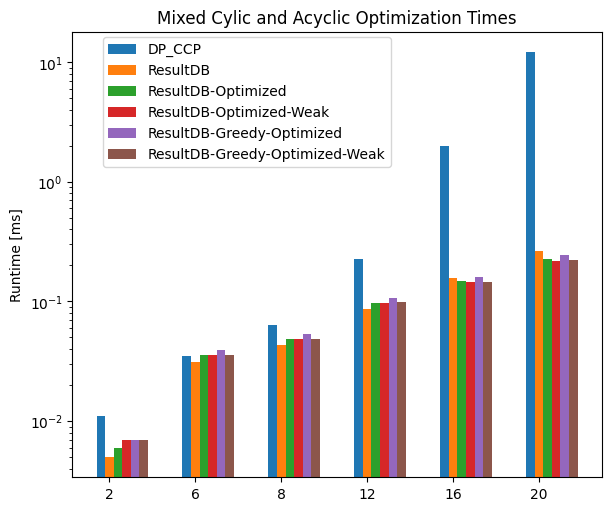

In [28]:
 # construct the following dictionary:
# {
#   'Single-Table': [q4_time, q5_time, ...]
#   'Single-Table + Denom': [q4_time, q5_time, ...]
#   'Result-DB': [q4_time, q5_time, ...]
# }
algorithm_times = {
    'DP_CCP': [],
    'ResultDB': [],
    'ResultDB-Optimized': [],
    'ResultDB-Optimized-Weak': [],
    'ResultDB-Greedy-Optimized': [],
    'ResultDB-Greedy-Optimized-Weak': []
}
# ensure that `queries` is sorted!
sizes = [2, 6, 8, 12, 16, 20]
data = pd.read_csv('./mutable-internal/evaluation/cycle_plus_outer_vertices.csv')
data = (data.groupby(by=['commit', 'date', 'version', 'suite', 'benchmark', 'experiment', 'name', 'config', 'case',], as_index=False)
                .median()
                .drop(['commit', 'date', 'version', 'suite', 'benchmark', 'experiment', 'runid'], axis=1)
        )
num_queries = 0
for size in sizes:
    # Get Results for each query 
    size_data = data[data['case'] == size]

    for _, row in size_data.iterrows():
        algorithm = row['name']
        execution_time = row['time']
        if "Single-Table" in algorithm:
            algorithm_times['Single-Table'].append(execution_time)
        elif "RESULTDB-Opt-Greedy-Weak" in algorithm:
            algorithm_times['ResultDB-Greedy-Optimized-Weak'].append(execution_time)
        elif "RESULTDB-Opt-Greedy" in algorithm:
            algorithm_times['ResultDB-Greedy-Optimized'].append(execution_time)
        elif "RESULTDB-Opt-Weak" in algorithm:
            algorithm_times['ResultDB-Optimized-Weak'].append(execution_time)
        elif "RESULTDB-Opt" in algorithm:
            algorithm_times['ResultDB-Optimized'].append(execution_time)
        elif "RESULTDB" in algorithm and not "NoGreedyCuts" in algorithm:
            algorithm_times['ResultDB'].append(execution_time)
        elif "DP" in algorithm:
            algorithm_times['DP_CCP'].append(execution_time)
        else:
            assert False, f"experiment name: {name} does not match any of our algorithms"
# display(algorithm_times)
print(algorithm_times)         
# plot data
x = np.arange(len(sizes))  # the label locations
width = 0.10  # the width of the bars
multiplier = 0
fig, ax = plt.subplots(layout='constrained', figsize=(6,5))
for algorithm, time in algorithm_times.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, time, width, label=algorithm)
    # ax.bar_label(rects, padding=3, size=8)
    multiplier += 1

ax.set_ylabel('Runtime [ms]')
ax.set_title('Mixed Cylic and Acyclic Optimization Times')
ax.set_xticks(x + width, sizes)
#ax.set_ylim(0)
ax.set_yscale('log')
# fig.legend()
fig.legend(bbox_to_anchor=(0.15, 0.95), loc='upper left')

fig.savefig('cycle_plus_outer_vertices-benchmarks.pdf')